In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import os
import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from torchvision import datasets
from torchvision import transforms

In [2]:
data_path ='../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                      transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, .4823, .4468), (.2470, .2435, .2616))]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                                      transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4915, .4823, .4468), (.2470, .2435, .2616))]))

In [4]:
# Part 1a.
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

n_out = 10
model = nn.Sequential(nn.Linear(3072, 512,),
                      nn.Tanh(),
                      nn.Linear(512,n_out),
                     nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

epoch_history = []
loss_history = []
time1 = time.time()
n_epochs=300
for epoch in range(n_epochs):
    for imgs, label in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_history.append(epoch)
    loss_history.append(float(loss))
    
    if epoch % 20 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        
stop_time = time.time()
time_elapsed = stop_time - time1

print("Total Training Time:", round(time_elapsed,2))

Epoch: 0, Loss: 1.438026
Epoch: 20, Loss: 0.942381
Epoch: 40, Loss: 0.368701
Epoch: 60, Loss: 0.151234
Epoch: 80, Loss: 0.052477
Epoch: 100, Loss: 0.051391
Epoch: 120, Loss: 0.030605
Epoch: 140, Loss: 0.015928
Epoch: 160, Loss: 0.021551
Epoch: 180, Loss: 0.008813
Epoch: 200, Loss: 0.010328
Epoch: 220, Loss: 0.011969
Epoch: 240, Loss: 0.012224
Epoch: 260, Loss: 0.004367
Epoch: 280, Loss: 0.004730
Total Training Time: 4478.49


In [8]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())
        
print("Validation Accuracy:", correct/total)

Validation Accuracy: 0.473


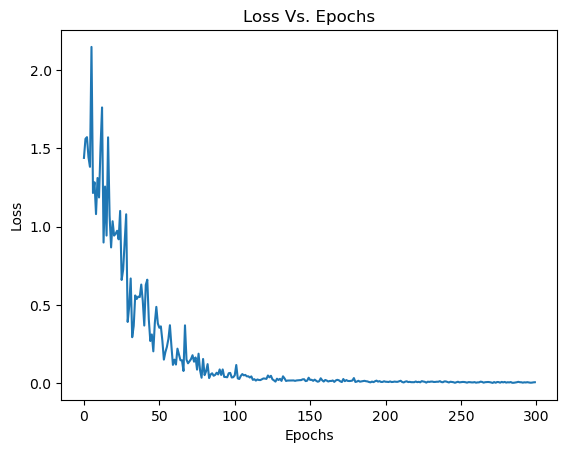

In [6]:
plt.plot(epoch_history, loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs. Epochs")
plt.show()

In [9]:
# Part 1b.
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

n_out = 10
model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.Tanh(),
                      nn.Linear(1024, 512),
                      nn.Tanh(),
                      nn.Linear(512, 256,),
                      nn.Tanh(),
                      nn.Linear(256,n_out),
                     nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

epoch_history = []
loss_history = []
time1 = time.time()
n_epochs=300
for epoch in range(n_epochs):
    for imgs, label in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_history.append(epoch)
    loss_history.append(float(loss))
    
    if epoch % 20 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        
stop_time = time.time()
time_elapsed = stop_time - time1

print("Total Training Time:", round(time_elapsed,2))

Epoch: 0, Loss: 1.667084
Epoch: 20, Loss: 0.622919
Epoch: 40, Loss: 0.313984
Epoch: 60, Loss: 0.002900
Epoch: 80, Loss: 0.002801
Epoch: 100, Loss: 0.001091
Epoch: 120, Loss: 0.000464
Epoch: 140, Loss: 0.000453
Epoch: 160, Loss: 0.000785
Epoch: 180, Loss: 0.000402
Epoch: 200, Loss: 0.000262
Epoch: 220, Loss: 0.000155
Epoch: 240, Loss: 0.000305
Epoch: 260, Loss: 0.000416
Epoch: 280, Loss: 0.000291
Total Training Time: 6330.95


In [10]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())
        
print("Validation Accuracy:", correct/total)

Validation Accuracy: 0.4748


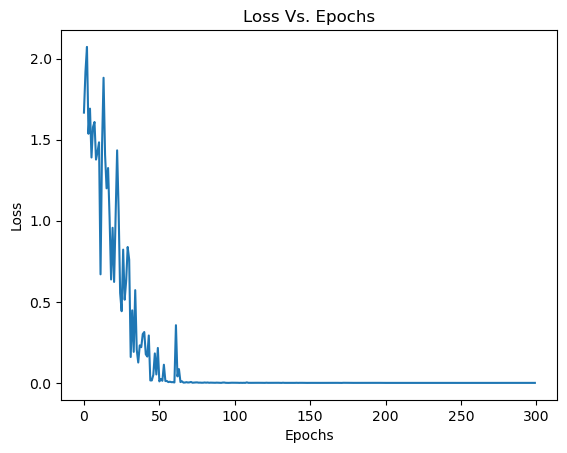

In [11]:
plt.plot(epoch_history, loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs. Epochs")
plt.show()